In [28]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import requests
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 10) # this controls figure size in the notebook

## Dataset

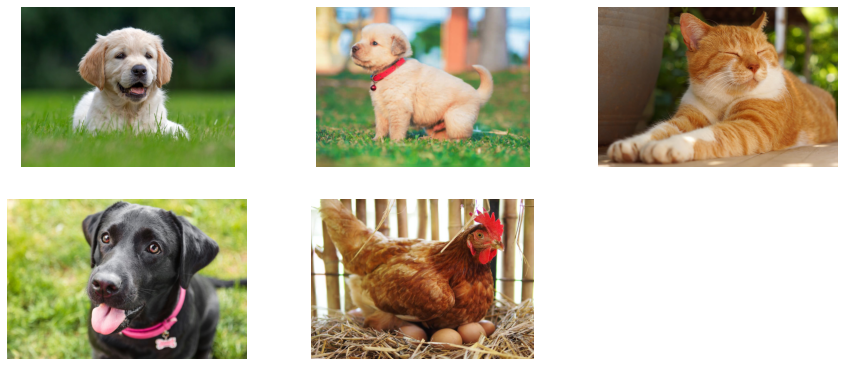

(5, 224, 224, 3)
float64


In [24]:
urls = []

urls.append("https://i.insider.com/5df126b679d7570ad2044f3e?width=1100&format=jpeg&auto=webp")
urls.append("https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")


imgs = []
plt.figure(figsize=(15,10))
for i in range(len(urls)):
    r = requests.get(urls[i], stream=True)   # download
    img = np.array(Image.open(r.raw))  #Konversi ke NP Array
    img_resize = cv.resize(img, (224, 224))
    imgs.append(img_resize)

    # plotting
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.show()

imgs = np.array(imgs, dtype='float')
print(imgs.shape)
print(imgs.dtype)

## Pre-Trained Models (VGG16)

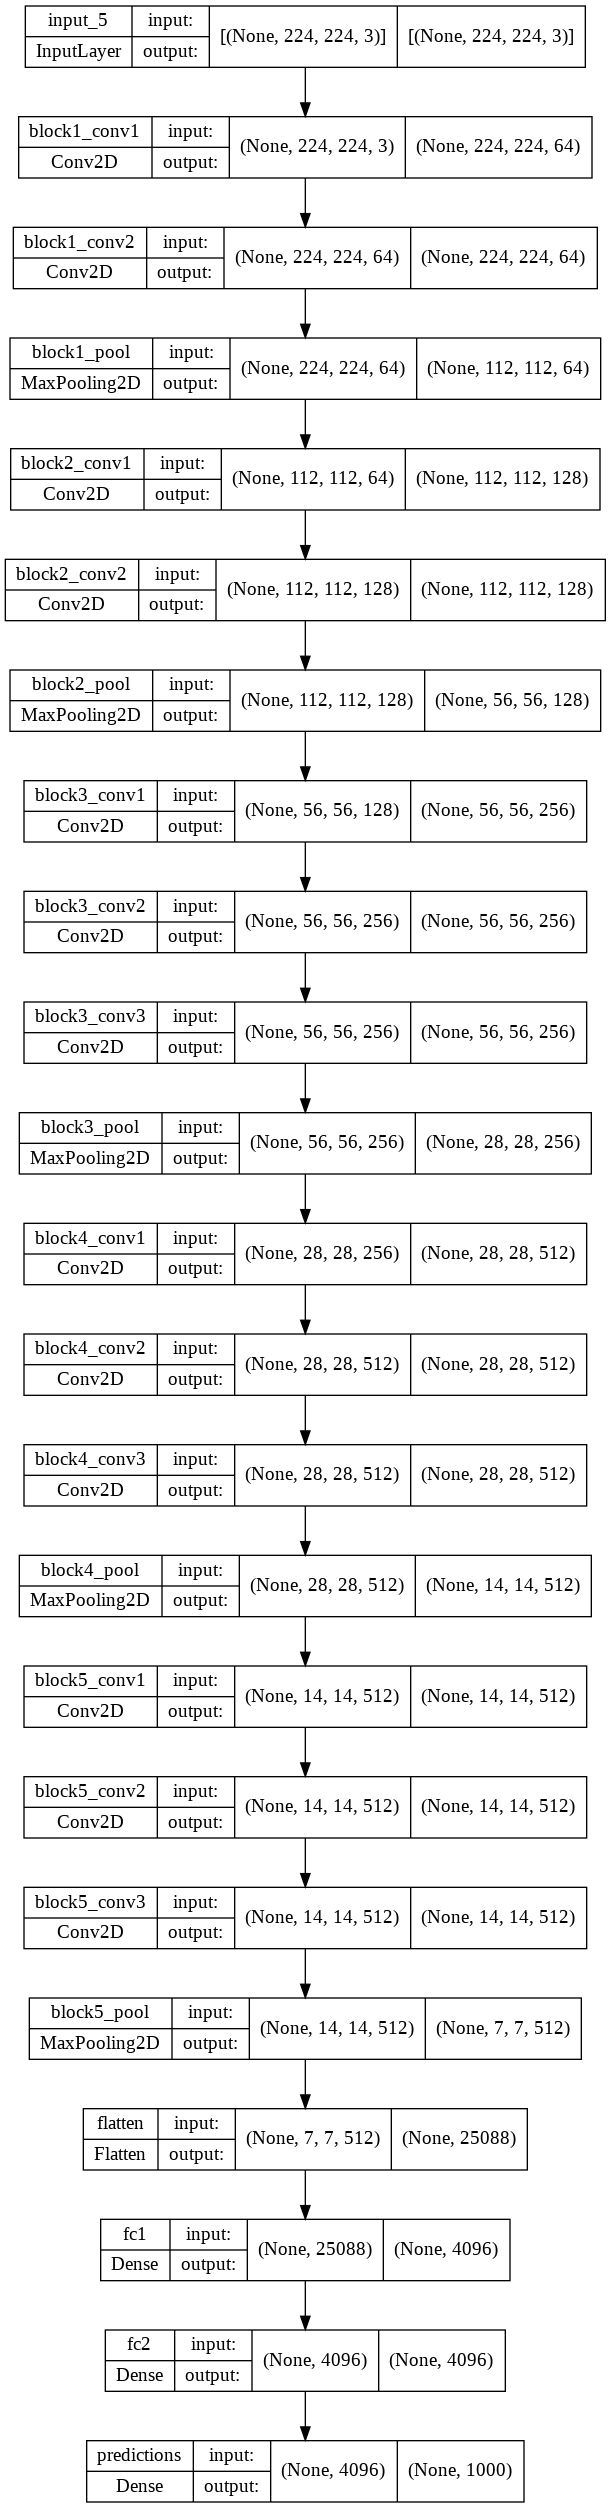

In [34]:
from keras.applications.vgg16 import VGG16

tf_model = VGG16(include_top=True, input_shape=None, weights='imagenet')

#tf_model.summary()
tf.keras.utils.plot_model(tf_model, show_shapes=True)

In [33]:
'''
# Ketik code di atas di sini
for layer in tf_model.layers: # freezing all layer except the last layer
  layer.trainable = False

tf.keras.utils.plot_model(tf_model, show_shapes=True)
'''

'\n# Ketik code di atas di sini\nfor layer in tf_model.layers: # freezing all layer except the last layer\n  layer.trainable = False\n\ntf.keras.utils.plot_model(tf_model, show_shapes=True)\n'

### Predict

In [40]:
y_hat = tf_model.predict(imgs)

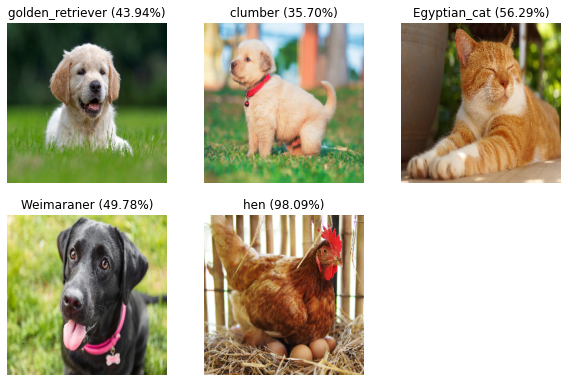

In [82]:
from keras.applications.vgg16 import decode_predictions

for i in range(len(y_hat)):
    # convert the probabilities to class labels
    labels = decode_predictions(np.expand_dims(y_hat[i], axis=0))

    # retrieve the most likely result, e.g. highest probability
    labels = labels[0][0]

    # print the classification
    #'%s (%.2f%%)' % (labels[1], labels[2]*100)
    
    # plotting
    imgs = np.array(imgs, dtype='int')
    plt.subplot(3,3,i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title('%s (%.2f%%)' % (labels[1], labels[2]*100))
    plt.axis('off')

plt.show()